[SALib中文文档](http://wsmxcz.com/index.php/2022/08/18/%E5%9F%BA%E4%BA%8Epython%E8%AF%AD%E8%A8%80%E7%9A%84%E7%81%B5%E6%95%8F%E5%BA%A6%E5%88%86%E6%9E%90-salib%E5%BA%93/)  
[API参数说明](https://blog.csdn.net/weixin_43388615/article/details/108456879?spm=1001.2101.3001.6650.6&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-6-108456879-blog-124807542.235%5Ev43%5Epc_blog_bottom_relevance_base2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-6-108456879-blog-124807542.235%5Ev43%5Epc_blog_bottom_relevance_base2&utm_relevant_index=13)  
分析有关因素发生某种变化对某一个或一组关键指标影响程度

* 返回值
    * S1：一阶Sobol指数，表示每个参数对输出的主导影响  
    * S2：二阶Sobol指数，表示两个参数之间的交互作用对输出的影响  
    * ST：总Sobol指数，表示每个参数总体上对输出的影响，包括直接和交互作用

          ST   ST_conf
x1  0.555860  0.087523
x2  0.441898  0.041033
x3  0.244675  0.027721
          S1   S1_conf
x1  0.316832  0.066861
x2  0.443763  0.050383
x3  0.012203  0.060516
                S2   S2_conf
(x1, x2)  0.009254  0.097320
(x1, x3)  0.238172  0.117635
(x2, x3) -0.004888  0.061355


C:\Users\black\AppData\Local\Temp\ipykernel_6388\1750452266.py:19: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N=1024)


<AxesSubplot: >

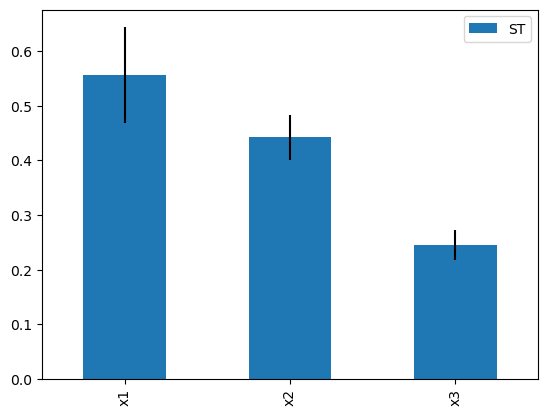

In [12]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot
import numpy as np

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

# Generate samples
# 采样，生成N*(2D+2)个样本（D为problem中参数个数），每个参数的值在[-3.14159265359, 3.14159265359]之间
param_values = saltelli.sample(problem, N=1024)

# Run model (example)
# 计算每个样本的输出值
Y = Ishigami.evaluate(param_values)

# Perform analysis
# 计算灵敏度指数
Si = sobol.analyze(problem, Y, print_to_console=True)
Si_df = Si.to_df()
barplot(Si_df[0])
